# Machine Learning - Homework 2: Part 1

## 1. Dataset Generation

The dataset that will be used throughout this part is already created and split for you. Do not change any part of the code below.

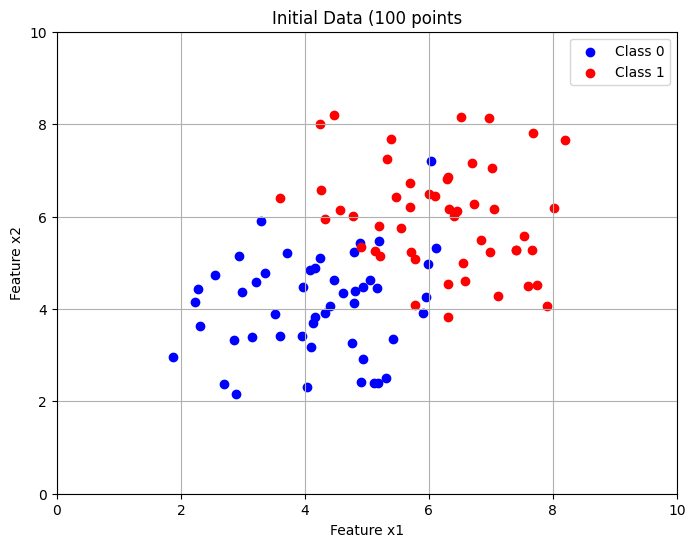

In [2]:
############# DO NOT CHANGE THIS PART #############

import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(n_points_per_class, seed):
    """
    Generates a 2-class dataset with 2 features.
    The classes are Gaussian clusters that have some overlap.

    Args:
    n_points_per_class (int): Number of points for class 0 and class 1
    seed (int): Random seed for reproducibility

    Returns:
    X (ndarray): (n_points*2, 2) array of features
    y (ndarray): (n_points*2,) array of labels (0 or 1)
    """
    np.random.seed(seed)

    # Class 0 properties: Centered at (4, 4)
    mean_0 = [4, 4]
    # Covariance matrix: [[var_x, cov_xy], [cov_xy, var_y]]
    # This creates an elliptical cluster
    cov_0 = [[1.5, 0.5], [0.5, 1.5]]

    # Class 1 properties: Centered at (6, 6)
    mean_1 = [6, 6]
    # This cluster slants the other way
    cov_1 = [[1.5, -0.5], [-0.5, 1.5]]

    # Generate the points
    class_0_x = np.random.multivariate_normal(mean_0, cov_0, n_points_per_class)
    class_1_x = np.random.multivariate_normal(mean_1, cov_1, n_points_per_class)

    # Combine into X and y
    X = np.concatenate((class_0_x, class_1_x))
    y = np.array([0]*n_points_per_class + [1]*n_points_per_class)

    return X, y

# Dataset generation
seed = 42
n_points_total = 100
n_per_class = n_points_total // 2

X, y = generate_dataset(n_points_per_class=n_per_class, seed=seed)

# Displat the dataset
title = f"Initial Data ({n_points_total} points"
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

plt.xlim(0, 10) # Adjusted for new data
plt.ylim(0, 10) # Adjusted for new data
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.title(title)
plt.grid(True)
plt.show()

############# DO NOT CHANGE THIS PART #############

# Machine Learning - Homework 2: Part 2

## 1. Dataset Generation

The dataset that will be used throughout this part is already created and split for you. Do not change any part of the code below.

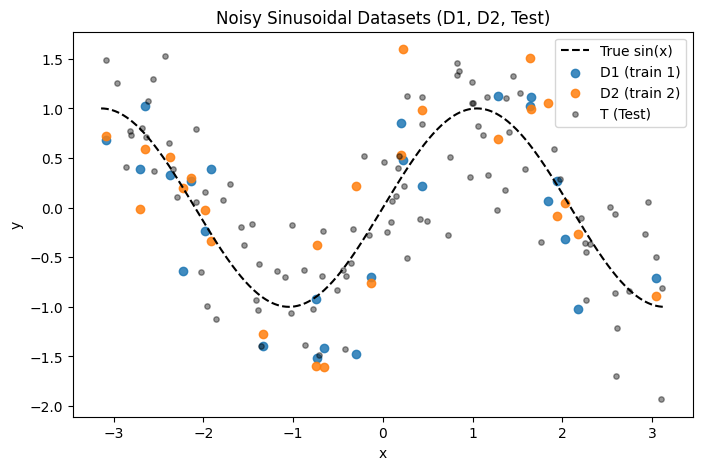

In [3]:
############# DO NOT CHANGE THIS PART #############

import numpy as np
import matplotlib.pyplot as plt

# Initial configurations
N_train = 25                 # points in D1 and D2
N_test = 100                 # points in test set
sigma = 0.5                 # standard deviation of noise
period = 2 * np.pi           # one period of sine wave
freq = 1.5                   # frequency of the sinusoidal
start_point = -period/2
end_point = start_point + period

# Dataset generation function
def make_dataset(n_points, sigma, seed_x, seed_noise):
    rng_x = np.random.default_rng(seed_x)
    rng_n = np.random.default_rng(seed_noise)

    X = np.sort(rng_x.uniform(start_point, end_point, size=n_points))
    noise = rng_n.normal(0.0, sigma, size=n_points)
    y = np.sin(freq*X) + noise

    return X.reshape(-1, 1), y

# Create datasets
X1, y1 = make_dataset(N_train, sigma, seed_x=412955, seed_noise=412067)  # D1
X2, y2 = make_dataset(N_train, sigma, seed_x=412955, seed_noise=412085)  # D2
Xt, yt = make_dataset(N_test,  sigma, seed_x=412738, seed_noise=412222)  # Test set

# Visualize the generated data
plt.figure(figsize=(8,5))
x_true = np.linspace(start_point, end_point, 400)
y_true = np.sin(freq*x_true)

plt.plot(x_true, y_true, 'k--', label='True sin(x)')
plt.scatter(X1, y1, color='tab:blue', label='D1 (train 1)', alpha=0.85)
plt.scatter(X2, y2, color='tab:orange', label='D2 (train 2)', alpha=0.85)
plt.scatter(Xt, yt, color='black', label='T (Test)', alpha=0.4, s=15)
plt.legend()
plt.title("Noisy Sinusoidal Datasets (D1, D2, Test)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


############# DO NOT CHANGE THIS PART #############

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# **Your job starts here!**


In [4]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction function
def predict(X, w):
    """
    X: (m, 2) feature matrix
    w: [w0, w1, w2] parameters
    Returns: predictions (m,)
    """
    m = X.shape[0]
    # Add bias term (column of ones)
    X_with_bias = np.column_stack([np.ones(m), X])
    # Calculate z = w0 + w1*x1 + w2*x2
    z = X_with_bias @ w
    return sigmoid(z)

# Cost function (Binary Cross-Entropy)
def compute_cost(X, y, w):
    """
    J(w) = -1/m * sum[y*log(y_hat) + (1-y)*log(1-y_hat)]
    """
    m = len(y)
    y_hat = predict(X, w)
    # Avoid log(0) by adding small epsilon
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    cost = -1/m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return cost

# Gradient computation
def compute_gradients(X, y, w):
    """
    Returns: [dJ/dw0, dJ/dw1, dJ/dw2]
    """
    m = len(y)
    y_hat = predict(X, w)

    # dJ/dw0 = 1/m * sum(y_hat - y)
    dw0 = 1/m * np.sum(y_hat - y)

    # dJ/dw1 = 1/m * sum((y_hat - y) * x1)
    dw1 = 1/m * np.sum((y_hat - y) * X[:, 0])

    # dJ/dw2 = 1/m * sum((y_hat - y) * x2)
    dw2 = 1/m * np.sum((y_hat - y) * X[:, 1])

    return np.array([dw0, dw1, dw2])

# Gradient descent update
def gradient_descent_step(X, y, w, learning_rate):
    """
    One step of gradient descent
    """
    gradients = compute_gradients(X, y, w)
    w_new = w - learning_rate * gradients
    return w_new

# Calculate error rate
def calculate_error_rate(X, y, w):
    """
    Error rate = (number of misclassified points) / (total points)
    """
    y_hat = predict(X, w)
    y_pred = (y_hat >= 0.5).astype(int)
    error_rate = np.mean(y_pred != y)
    return error_rate

# Plot decision boundary
def plot_decision_boundary(X, y, w, title_suffix=""):
    plt.figure(figsize=(8, 6))

    # Plot data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

    # Plot decision boundary
    # Decision boundary: w0 + w1*x1 + w2*x2 = 0
    # Solving for x2: x2 = -(w0 + w1*x1) / w2
    x1_line = np.linspace(0, 10, 100)
    x2_line = -(w[0] + w[1] * x1_line) / w[2]
    plt.plot(x1_line, x2_line, 'g-', linewidth=2, label='Decision Boundary')

    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel('Feature x1')
    plt.ylabel('Feature x2')
    plt.legend()
    plt.title(f'Logistic Regression {title_suffix}')
    plt.grid(True)
    plt.show()

Q1: Running gradient descent for 10 iterations

Iteration 1: Cost = 0.677939
Iteration 3: Cost = 0.673844
Iteration 5: Cost = 0.672201
Iteration 7: Cost = 0.670602
Iteration 9: Cost = 0.669013
Iteration 10: Cost = 0.668221

Q1 ANSWERS:
w0 = -0.0823
w1 = 0.0468
w2 = 0.0389
Error Rate = 0.5000



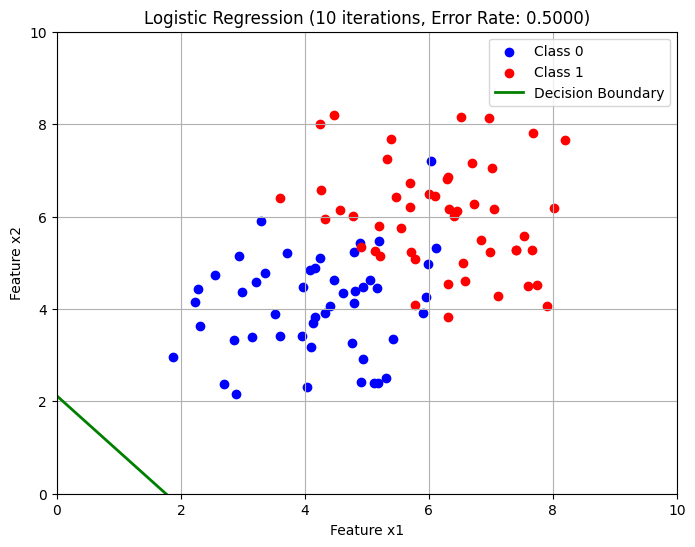

In [5]:
# Q1: Fixed 10 iterations

# Initial parameters
w = np.array([0.0, 0.0, 0.0])
learning_rate = 0.1
n_iterations = 10

print("Q1: Running gradient descent for 10 iterations\n")

for i in range(n_iterations):
    w = gradient_descent_step(X, y, w, learning_rate)
    cost = compute_cost(X, y, w)
    if i % 2 == 0 or i == n_iterations - 1:
        print(f"Iteration {i+1}: Cost = {cost:.6f}")

# Final results
error_rate_q1 = calculate_error_rate(X, y, w)

print(f"\n{'='*50}")
print("Q1 ANSWERS:")
print(f"{'='*50}")
print(f"w0 = {w[0]:.4f}")
print(f"w1 = {w[1]:.4f}")
print(f"w2 = {w[2]:.4f}")
print(f"Error Rate = {error_rate_q1:.4f}")
print(f"{'='*50}\n")

# Plot
plot_decision_boundary(X, y, w, f"(10 iterations, Error Rate: {error_rate_q1:.4f})")

Q2: Running gradient descent until convergence (cost change < 1e-5)


Converged at iteration 4102

Q2 ANSWERS:
Number of Iterations = 4102.0000
w0 = -10.5776
w1 = 1.0299
w2 = 1.0452
Error Rate = 0.0900



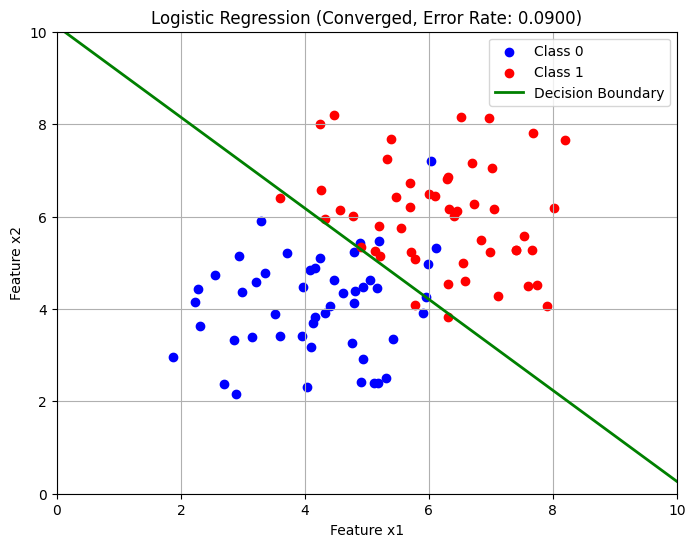

In [6]:
# Q2: Until cost change < 1e-5

# Reset to initial parameters
w = np.array([0.0, 0.0, 0.0])
learning_rate = 0.1
tolerance = 1e-5
max_iterations = 10000

print("Q2: Running gradient descent until convergence (cost change < 1e-5)\n")

prev_cost = compute_cost(X, y, w)
iteration_count = 0

for i in range(max_iterations):
    w = gradient_descent_step(X, y, w, learning_rate)
    current_cost = compute_cost(X, y, w)
    cost_change = abs(current_cost - prev_cost)

    iteration_count = i + 1


    if cost_change < tolerance:
        print(f"\nConverged at iteration {iteration_count}")
        break

    prev_cost = current_cost



error_rate_q2 = calculate_error_rate(X, y, w)

print(f"\n{'='*50}")
print("Q2 ANSWERS:")
print(f"{'='*50}")
print(f"Number of Iterations = {iteration_count:.4f}")
print(f"w0 = {w[0]:.4f}")
print(f"w1 = {w[1]:.4f}")
print(f"w2 = {w[2]:.4f}")
print(f"Error Rate = {error_rate_q2:.4f}")
print(f"{'='*50}\n")

# Plot
plot_decision_boundary(X, y, w, f"(Converged, Error Rate: {error_rate_q2:.4f})")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
def polynomial_regression(X_train, y_train, X_test, y_test, degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)

    return y_pred, mse

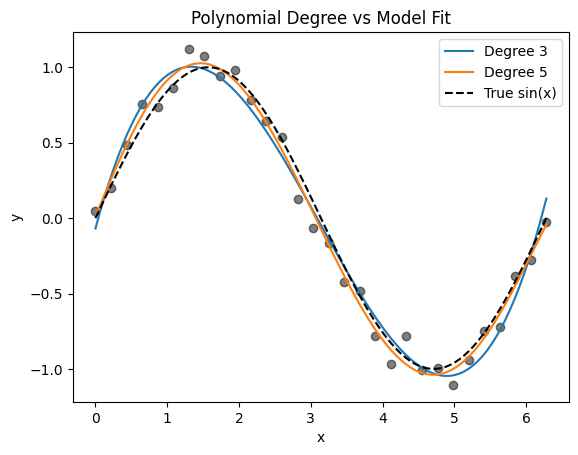

Degree 3 -> Train MSE: 0.0101, Test MSE: 0.0072
Degree 5 -> Train MSE: 0.0056, Test MSE: 0.0026

===== FINAL ANSWERS =====
As polynomial degree increases → Variance: increase
The bias of the 3rd degree model is expected to be larger.


In [ ]:
np.random.seed(42)
X = np.linspace(0, 2*np.pi, 30)
y_true = np.sin(X)
y = y_true + np.random.normal(0, 0.1, size=len(X))
X = X.reshape(-1, 1)

degrees = [3, 5]
train_errors = []
test_errors = []


X_test = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
y_test_true = np.sin(X_test)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression().fit(X_poly, y)

    y_train_pred = model.predict(X_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse = mean_squared_error(y, y_train_pred)
    test_mse = mean_squared_error(y_test_true, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)


    plt.plot(X_test, y_test_pred, label=f"Degree {d}")

plt.scatter(X, y, color="black", alpha=0.5)
plt.plot(X_test, y_test_true, "k--", label="True sin(x)")
plt.legend()
plt.title("Polynomial Degree vs Model Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


for i, d in enumerate(degrees):
    print(f"Degree {d} -> Train MSE: {train_errors[i]:.4f}, Test MSE: {test_errors[i]:.4f}")


variance_change = "increase"
bias_model = "3rd degree"

print("\n===== FINAL ANSWERS =====")
print(f"As polynomial degree increases → Variance: {variance_change}")
print(f"The bias of the {bias_model} model is expected to be larger.")

In [ ]:
y_pred_d3_D1, mse_d3_D1 = polynomial_regression(X1, y1, Xt, yt, 3)
y_pred_d3_D2, mse_d3_D2 = polynomial_regression(X2, y2, Xt, yt, 3)

print(f"3rd Degree MSE (D1): {mse_d3_D1:.4f}")
print(f"3rd Degree MSE (D2): {mse_d3_D2:.4f}")

3rd Degree MSE (D1): 0.3758
3rd Degree MSE (D2): 0.3549


In [ ]:
y_pred_d5_D1, mse_d5_D1 = polynomial_regression(X1, y1, Xt, yt, 5)
y_pred_d5_D2, mse_d5_D2 = polynomial_regression(X2, y2, Xt, yt, 5)

print(f"5th Degree MSE (D1): {mse_d5_D1:.4f}")
print(f"5th Degree MSE (D2): {mse_d5_D2:.4f}")

5th Degree MSE (D1): 0.3772
5th Degree MSE (D2): 0.3887


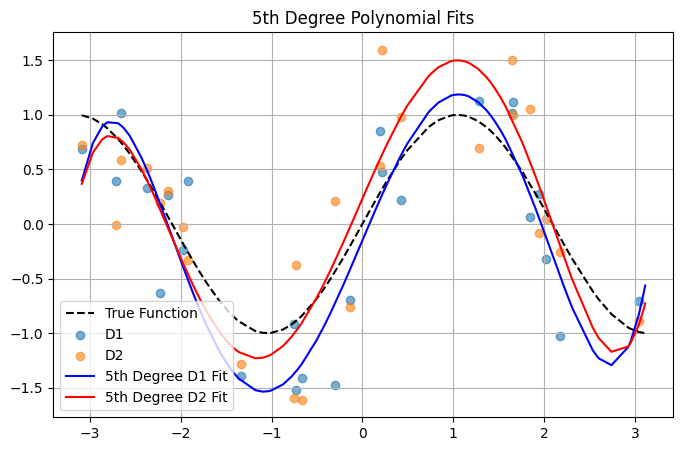

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(Xt, np.sin(1.5*Xt), 'k--', label='True Function')
plt.scatter(X1, y1, color='tab:blue', alpha=0.6, label='D1')
plt.scatter(X2, y2, color='tab:orange', alpha=0.6, label='D2')
plt.plot(Xt, y_pred_d5_D1, 'b', label='5th Degree D1 Fit')
plt.plot(Xt, y_pred_d5_D2, 'r', label='5th Degree D2 Fit')
plt.legend()
plt.title("5th Degree Polynomial Fits")
plt.grid(True)
plt.show()


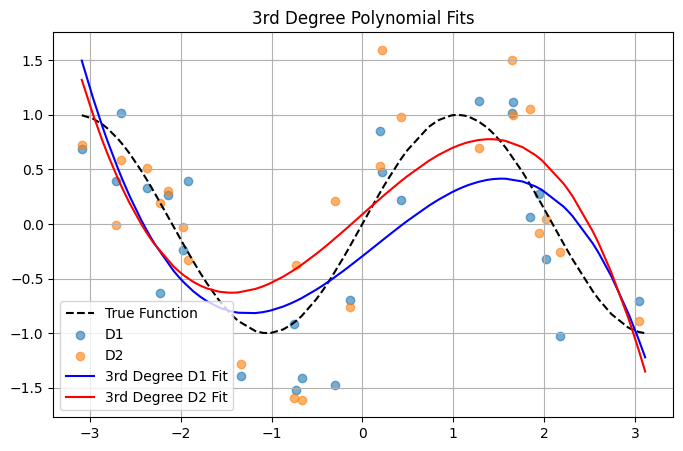

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(Xt, np.sin(1.5*Xt), 'k--', label='True Function')
plt.scatter(X1, y1, color='tab:blue', alpha=0.6, label='D1')
plt.scatter(X2, y2, color='tab:orange', alpha=0.6, label='D2')
plt.plot(Xt, y_pred_d3_D1, 'b', label='3rd Degree D1 Fit')
plt.plot(Xt, y_pred_d3_D2, 'r', label='3rd Degree D2 Fit')
plt.legend()
plt.title("3rd Degree Polynomial Fits")
plt.grid(True)
plt.show()

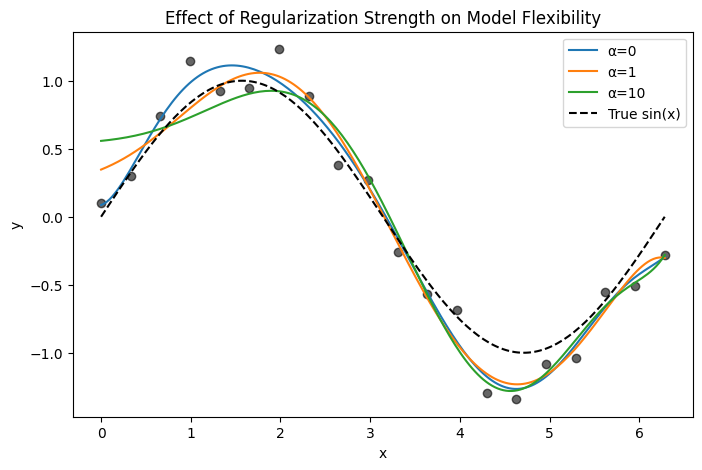

Final Answer: Increasing regularization strength (α) decreases the model flexibility.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Veri üretimi (sinüs + gürültü)
np.random.seed(42)
X = np.linspace(0, 2*np.pi, 20)
y = np.sin(X) + np.random.normal(0, 0.2, size=len(X))
X = X.reshape(-1, 1)

# Farklı alpha değerleriyle Ridge modelleri
alphas = [0, 1, 10]
x_plot = np.linspace(0, 2*np.pi, 200).reshape(-1, 1)
y_true = np.sin(x_plot)

plt.figure(figsize=(8, 5))
for alpha in alphas:
    model = make_pipeline(PolynomialFeatures(9), Ridge(alpha=alpha))
    model.fit(X, y)
    y_pred = model.predict(x_plot)
    plt.plot(x_plot, y_pred, label=f"α={alpha}")

plt.scatter(X, y, color="black", alpha=0.6)
plt.plot(x_plot, y_true, "k--", label="True sin(x)")
plt.legend()
plt.title("Effect of Regularization Strength on Model Flexibility")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("Final Answer: Increasing regularization strength (α) decreases the model flexibility.")

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [13]:
alphas = [0, 0.5, 1, 1.5, 5]

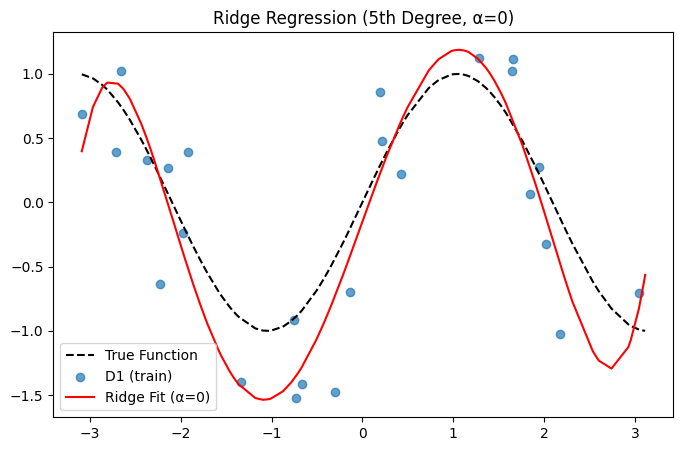

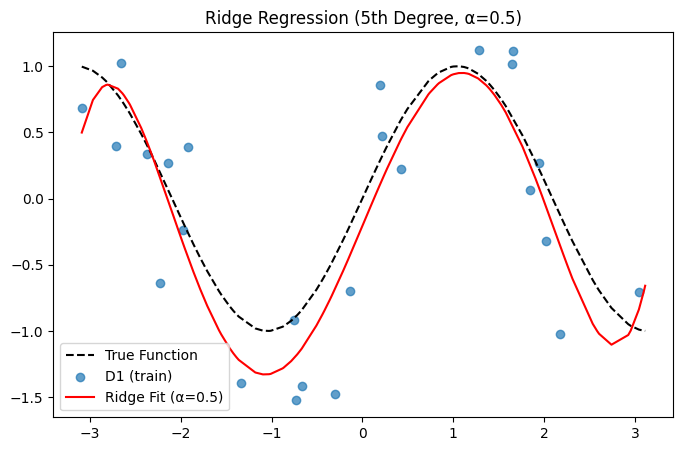

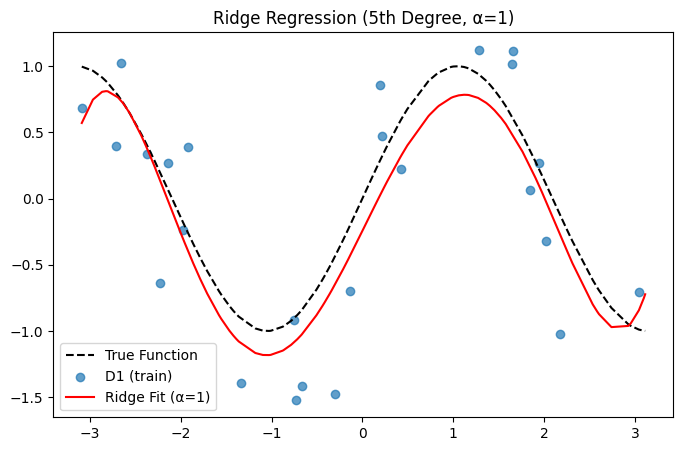

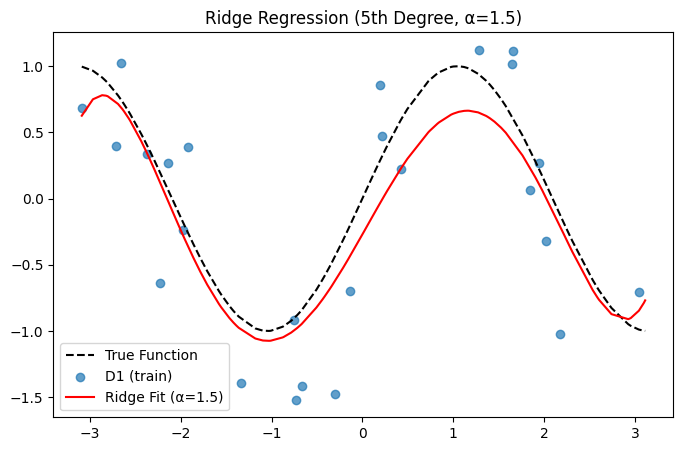

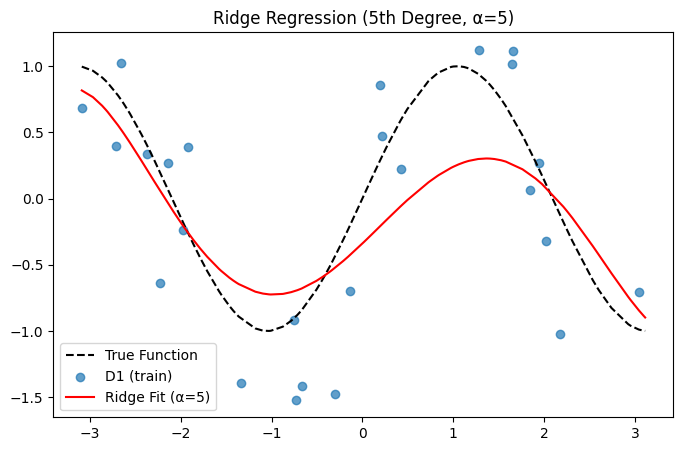

α | Train MSE | Test MSE
0 | 0.1713 | 0.3772
0.5 | 0.1835 | 0.3034
1 | 0.2068 | 0.2797
1.5 | 0.2318 | 0.2771
5 | 0.3575 | 0.3517

Model Analysis:
α=1.5: Best Fit
α=5: Underfitting

 Best model: α=1.5 (Train MSE=0.2318, Test MSE=0.2771)


In [14]:

poly = PolynomialFeatures(degree=5)
X1_poly = poly.fit_transform(X1)
Xt_poly = poly.transform(Xt)

results = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X1_poly, y1)

    y_train_pred = ridge.predict(X1_poly)
    y_test_pred = ridge.predict(Xt_poly)

    train_mse = mean_squared_error(y1, y_train_pred)
    test_mse = mean_squared_error(yt, y_test_pred)

    results.append((alpha, train_mse, test_mse))


    plt.figure(figsize=(8,5))
    plt.plot(Xt, np.sin(freq*Xt), 'k--', label='True Function')
    plt.scatter(X1, y1, color='tab:blue', label='D1 (train)', alpha=0.7)
    plt.plot(Xt, y_test_pred, 'r', label=f'Ridge Fit (α={alpha})')
    plt.title(f'Ridge Regression (5th Degree, α={alpha})')
    plt.legend()
    plt.show()


print("α | Train MSE | Test MSE")
for r in results:
    print(f"{r[0]} | {r[1]:.4f} | {r[2]:.4f}")

best_alpha, best_train_mse, best_test_mse = min(results, key=lambda x: x[2])

best_alpha, best_train_mse, best_test_mse = min(results, key=lambda x: x[2])

print("\nModel Analysis:")
for alpha, train_mse, test_mse in results:
    # Underfitting: hem train hem test yüksek ve birbirine yakın
    if abs(train_mse - test_mse) < 0.05 and train_mse > 0.25 and test_mse > 0.25:
        print(f"α={alpha}: Underfitting")
    elif alpha == best_alpha:
        print(f"α={alpha}: Best Fit")

print(f"\n Best model: α={best_alpha} (Train MSE={best_train_mse:.4f}, Test MSE={best_test_mse:.4f})")